In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.preprocessing import LabelEncoder


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/House_pricing/train_validate.csv')

In [ ]:
df.columns

Index(['status', 'price', 'bed', 'bath', 'acre_lot', 'full_address', 'street',
       'city', 'state', 'zip_code', 'house_size', 'sold_date'],
      dtype='object')

In [ ]:
df['acre_lot']

0         0.14
1          NaN
2         0.08
3          NaN
4         0.05
          ... 
738522    0.14
738523     NaN
738524     NaN
738525    0.05
738526    0.12
Name: acre_lot, Length: 738527, dtype: float64

**Sanity_check**

In [ ]:
def sanity_check(df,mode='train'):
    '''
      This function perform sanity and check create a dataframe.
      Input:
        df : Dataframe which require sanity-check
        mode : train or predict
      return : None
    '''
    if mode == 'train':
      print('Percentage of missing values column wise\n:', df.isnull().sum()/len(df))
    # sold_date must be datetime object
    df['sold_date'] = pd.to_datetime(df['sold_date'])
    print('sanity check done!')
    return df


**Handling missing values**

In [ ]:

def handling_missing_values(df):

    df.dropna(inplace=True)
    columns_to_dropped = ['full_address', 'street', "city", 'status', 'zip_code',
                          "sold_date"]  # reasons states in EDA part.
    df.drop(columns_to_dropped, axis=1, inplace=True)
    print('handling of missing values done!')
    return df

**Removes_outliers**

In [ ]:
def remove_state_outlier(value):
    if value not in ['New Jersey','Connecticut','New York','Pennsylvania','Massachusetts']:
        return 'New Jersey'
    else:
        return value

def remove_bed_outlier(value):
    if value not in [3,4,2,5]:
        return 3
    else:
        return value

def remove_bath_outlier(value):
    if value not in [1,2,3,4]:
        return 2
    else:
        return value
def handling_outliers(df, mode = 'train'):
    if mode == 'train':
        df = df[(df["price"] < 800000) & (df["house_size"] < 5000)]  # reason explained in EDA part

    df['state'] = df['state'].apply(remove_state_outlier)
    df['bath'] = df['bath'].apply(remove_bath_outlier)
    df['bed'] = df['bed'].apply(remove_bed_outlier)

    print('handling of outliers done!')
    return df

**handling catgoricals columns**

In [ ]:

def handling_categorical_cols(df):
    """
    This function encodes a categorical column based on the basis of their order label.
    input:
        df : Input DataFrame in which encoding has to be created
        col : Column name which has to be encoded
    return:
          label encoded dict for column

    """

    object_columns = df.select_dtypes(object).columns
    for col in object_columns:
        le = LabelEncoder()
        le.fit(df[col])
        encoded_dict = dict(zip((le.classes_),le.transform(le.classes_)))
        df[col] = df[col].replace(encoded_dict)
    print('encoding of categorical columns done!')
    return encoded_dict, df


**pipeline of preprocessing**

In [ ]:

def pre_process(df, target):
    df = sanity_check(df)
    print('shape of dataframe before dropping null values and columns:', df.shape)

    df = handling_missing_values(df)
    print('shape of dataframe after dropping null values and columns:', df.shape)
    df = handling_outliers(df, mode = 'train')
    encoded_dict, df = handling_categorical_cols(df)
    X = df.drop([target], axis =1)
    y = df[target]
    return X, y, encoded_dict, df

In [ ]:
X, y, encoded_dict, df = pre_process(df, 'price')
print(X.shape)
print(y.shape)
print(encoded_dict)
print(df.head())

Percentage of missing values column wise
: status          0.000000
price           0.000080
bed             0.142610
bath            0.124729
acre_lot        0.296102
full_address    0.000000
street          0.002299
city            0.000076
state           0.000000
zip_code        0.000214
house_size      0.322883
sold_date       0.505444
dtype: float64
sanity check done!
shape of dataframe before dropping null values and columns: (738527, 12)
handling of missing values done!
shape of dataframe after dropping null values and columns: (185633, 6)
handling of outliers done!
encoding of categorical columns done!
(143373, 5)
(143373,)
{'Connecticut': 0, 'Massachusetts': 1, 'New Jersey': 2, 'New York': 3, 'Pennsylvania': 4}
       price  bed  bath  acre_lot  state  house_size
5   335000.0  4.0   2.0      1.20      2      2920.0
14  639900.0  4.0   4.0      0.29      2      3852.0
20  366000.0  3.0   3.0      0.04      2      1636.0
24  225000.0  4.0   2.0      0.13      2      1502.0
37  

In [ ]:
df.corr()

,price,bed,bath,acre_lot,state,house_size
price,1.000000,0.235788,0.440061,0.003011,0.095758,0.404337
bed,0.235788,1.000000,0.378190,0.000372,-0.047524,0.466705
bath,0.440061,0.378190,1.000000,0.012269,-0.033286,0.620730
acre_lot,0.003011,0.000372,0.012269,1.000000,0.008278,0.008518
state,0.095758,-0.047524,-0.033286,0.008278,1.000000,-0.066833
house_size,0.404337,0.466705,0.620730,0.008518,-0.066833,1.000000


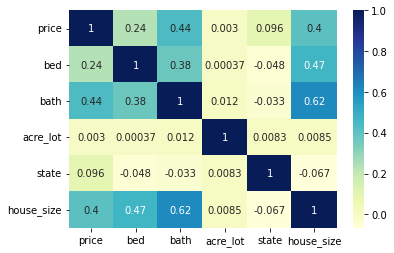

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

**Evaluation**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import SplineTransformer
from sklearn import linear_model
from sklearn import metrics

In [ ]:
X = df.drop(['price'], axis = 1)
y = df['price']
def info_features(X,y):
  print('shape of x:',X.shape)
  print('shape of y:',y.shape)
  print('length of y:',len(y))
  
info_features(X,y)

shape of x: (143373, 5)
shape of y: (143373,)
length of y: 143373


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import SplineTransformer
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
## Baseline model
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
metrics.r2_score(y_train,reg.predict(X_train)), metrics.r2_score(y_test,reg.predict(X_test))

(0.2370852381726707, 0.23616532942634128)

In [ ]:
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv =10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(X_train, y_train)
metrics.r2_score(y_train,knn_regressor.predict(X_train)),metrics.r2_score(y_test,knn_regressor.predict(X_test))

(0.9853856161183896, 0.9260929594374975)

In [ ]:
knn_regressor.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='neg_mean_squared_error')>

In [ ]:
knn_regressor.best_params_

{'n_neighbors': 1}

**Complete pipeline for test dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/House_pricing/test.csv')

In [ ]:

def preprocess_and_predict(df, target):
    '''
      This function takes in new dataframe or row of observation and generate all features
    Input :
        df : DataFrame or row of observation
        encoded_dict : Dictonary created while training for Categorical Encoded Value.
    '''
    df = sanity_check(df, mode='predict')
    df = handling_missing_values(df)
    df = handling_outliers(df, mode = 'predict')
    encoded_dict_test, df = handling_categorical_cols(df)

    X = df.drop([target], axis = 1)
    return X, encoded_dict

In [ ]:

test_input, encoded_dict_test = preprocess_and_predict(df, 'price')
print('encoded_dict_test_data', encoded_dict_test)
print(test_input.head())
knn_regressor.predict(test_input)

print(knn_regressor.predict(test_input))

sanity check done!
handling of missing values done!
handling of outliers done!
encoding of categorical columns done!
encoded_dict_test_data {'Connecticut': 0, 'Massachusetts': 1, 'New Jersey': 2, 'New York': 3, 'Pennsylvania': 4}
    bed  bath  acre_lot  state  house_size
0   3.0   1.0      0.13      2      1514.0
3   4.0   3.0      0.59      0      1855.0
7   4.0   3.0      0.46      1      1934.0
10  3.0   1.0      0.02      2       994.0
14  4.0   2.0      0.07      0      2072.0


UsageError: Line magic function `%%time` not found.


In [ ]:
import joblib
import pickle

In [ ]:
# Store data (serialize)
with open('encoded.pickle', 'wb') as handle:
    pickle.dump(encoded_dict_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Load data (deserialize)
with open('encoded.pickle', 'rb') as handle:
    saved_ecoding = pickle.load(handle)

In [ ]:
# Store data (serialize)
with open('model.pickle', 'wb') as handle:
    pickle.dump(knn_regressor, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Load data (deserialize)
with open('model.pickle', 'rb') as handle:
    saved_model = pickle.load(handle)

In [ ]:
print(saved_model.predict(test_input))

[175000. 374900. 679900. ... 459900. 415000. 225000.]


**deployment and predictions**

In [ ]:
## API- Development
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyngrok==4.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15982 sha256=ddafb8c3c324c36606e6e9f3d66c7194211312a96350ab69cdc95088c656aa0c
  Stored in directory: /root/.cache/pip/wheels/5e/0a/51/8cb053ccd84481dd3233eba4cdb608bc7a885fd8ca418c0806
Successfully built pyngrok


In [ ]:
json_data = {"bed":3,"bath":1,"acre_lot":0.13,"state":"New York","house_size":1514}

# Convert json data to dataframe
df = pd.DataFrame.from_dict(pd.json_normalize(json_data), orient='columns')
print("-"*80)
print(df)

--------------------------------------------------------------------------------
   bed  bath  acre_lot     state  house_size
0    3     1      0.13  New York        1514


In [ ]:
data = preprocess_and_predict(df,'price')
print("-"*80)
print(data)
print("-"*80)

KeyError: ignored